In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mall customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.drop(['CustomerID','Gender'], axis=1, inplace=True)

In [5]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [6]:
#df = df.rename(columns={'Age': 'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'})
df.rename(columns={'Age': 'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'},inplace=True)

In [7]:
df.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [8]:
df.shape

(200, 3)

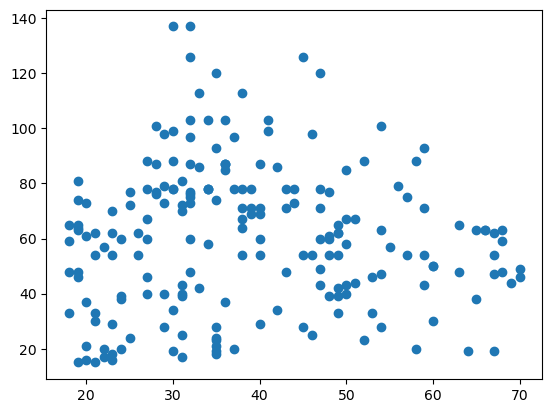

In [9]:
plt.scatter(df.age, df.income)

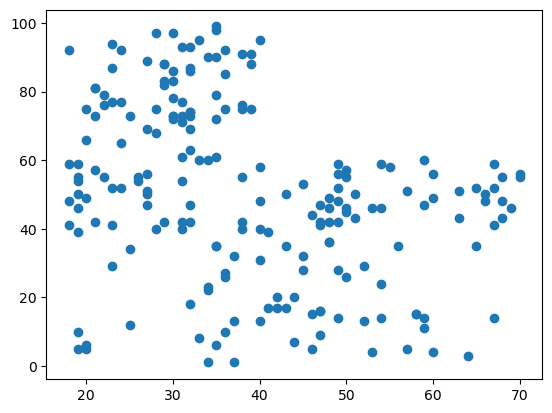

In [10]:
plt.scatter(df.age, df.score)

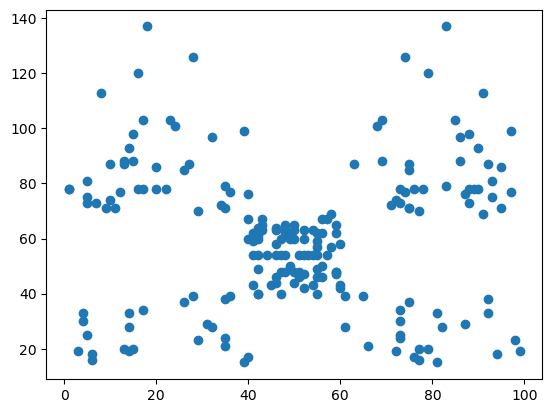

In [11]:
plt.scatter(df.score, df.income)

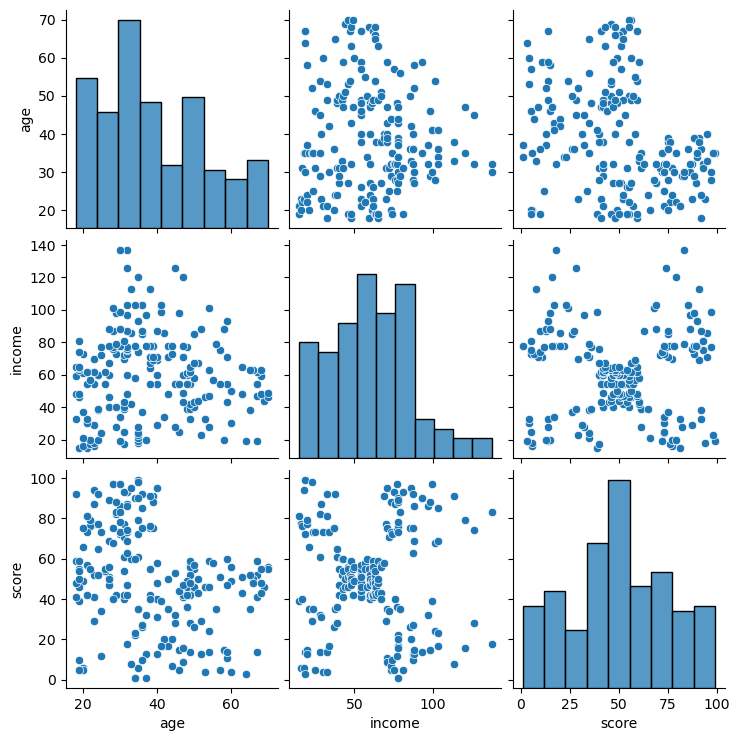

In [12]:
import seaborn as sns
sns.pairplot(df[['age','income','score']])
plt.savefig('image.png')

# KMEANS CLUSTER

[KMeans Cluster](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

[Download this Cheatsheet](https://github.com/rashakil-ds/Top-Data-Science-AI-Book-Collection/blob/main/Other%20Docs/Clustering%20Algorithms.pdf)

Text(0, 0.5, 'Income in $1000')

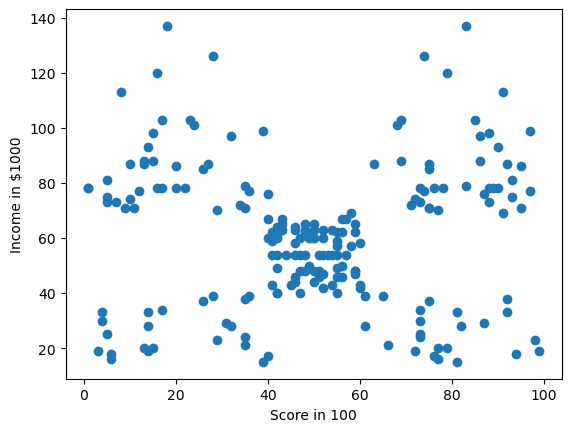

In [13]:
plt.scatter(df.score, df.income)
plt.xlabel('Score in 100')
plt.ylabel('Income in $1000')

In [14]:
from sklearn.cluster import KMeans

In [15]:
km = KMeans() #cluster তৈরি করতে চাই

In [16]:
df.isnull().sum()

age       0
income    0
score     0
dtype: int64

In [17]:
df.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [18]:
df['score'].shape

(200,)

In [19]:
df['income'].shape

(200,)

In [20]:
km.fit(df[['score','income']])

KMeans()

In [21]:
#km.predict(df[['score','income']])

In [22]:
df['defClusters'] = km.fit_predict(df[['score','income']])

In [23]:
df.head()

,age,income,score,defClusters
0,19,15,39,3
1,21,15,81,5
2,20,16,6,3
3,23,16,77,5
4,31,17,40,3


In [24]:
centroid1 = km.cluster_centers_
centroid1

array([[ 51.51282051,  45.51282051],
       [ 81.89285714,  78.03571429],
       [ 13.39130435,  79.73913043],
       [ 19.52380952,  25.14285714],
       [ 82.72727273, 108.18181818],
       [ 81.        ,  24.95      ],
       [ 47.29166667,  62.58333333],
       [ 22.        , 109.7       ]])

In [25]:
df0 = df[df.defClusters==0]
df1 = df[df.defClusters==1]
df2 = df[df.defClusters==2]
df3 = df[df.defClusters==3]
df4 = df[df.defClusters==4]
df5 = df[df.defClusters==5]
df6 = df[df.defClusters==6]
df7 = df[df.defClusters==7]

In [26]:
df0.shape

(39, 4)

In [27]:
df6.shape

(48, 4)

Text(0, 0.5, 'Income in $1000')

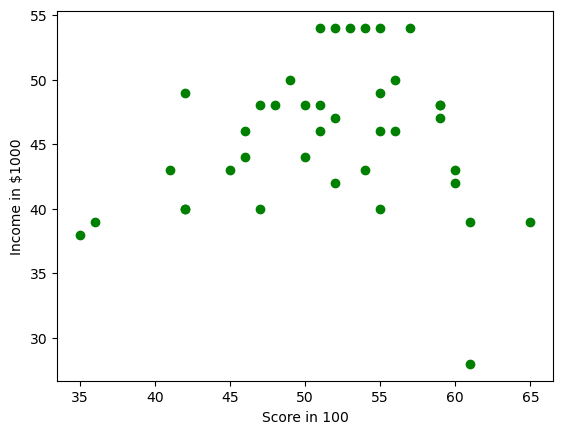

In [28]:
plt.scatter(df0.score, df0.income,color='green')
plt.xlabel('Score in 100')
plt.ylabel('Income in $1000')

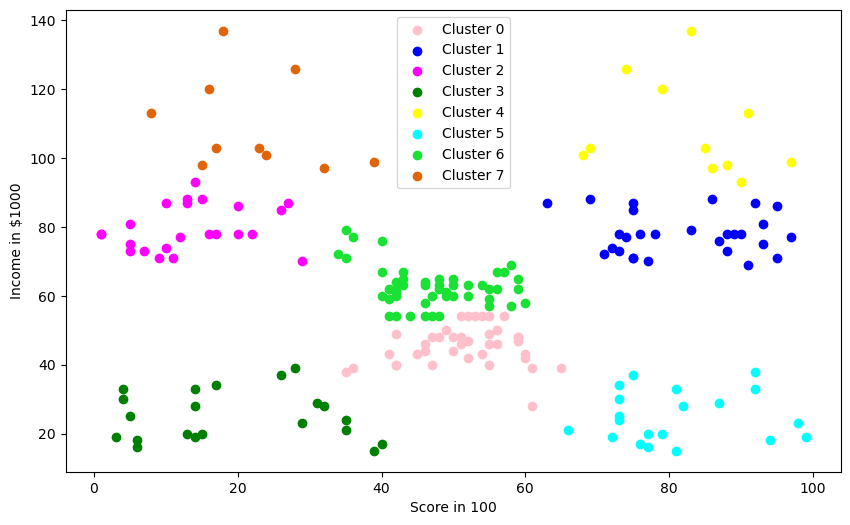

In [29]:
plt.figure(figsize=(10,6))

plt.scatter(df0.score, df0.income, color='pink', label='Cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='Cluster 1')
plt.scatter(df2.score, df2.income, color='magenta', label='Cluster 2')
plt.scatter(df3.score, df3.income, color='green', label='Cluster 3')
plt.scatter(df4.score, df4.income, color='yellow', label='Cluster 4')
plt.scatter(df5.score, df5.income, color='cyan', label='Cluster 5')
plt.scatter(df6.score, df6.income, color='#19e234', label='Cluster 6')
plt.scatter(df7.score, df7.income, color='#e0650a', label='Cluster 7')

plt.xlabel('Score in 100')
plt.ylabel('Income in $1000')

plt.legend()

# Objective Function

Objective function of k-means clustering:
J = ∑_{i=1}^{k} ∑_{x ∈ C_i} ||x - μ_i||^2

Where:
- k is the number of clusters.
- C_i represents the i-th cluster.
- μ_i is the centroid (mean) of cluster C_i.
- ||x - μ_i||^2 represents the squared Euclidean distance between data point x and the centroid μ_i of its assigned cluster.


In [30]:
wcss = []
cluster = range(1,15)

for k in cluster:
    clst = KMeans(n_clusters=k)
    clst.fit(df[['score','income']])
    wcss.append(clst.inertia_)  # inertia_ = calculate WCSS

In [31]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30259.65720728547,
 25018.576334776335,
 21850.165282585636,
 19664.685196005543,
 17633.878680834292,
 15808.588580096646,
 14339.526424097725,
 13133.747941489404]

Text(0.5, 0, 'Number of Clusters')

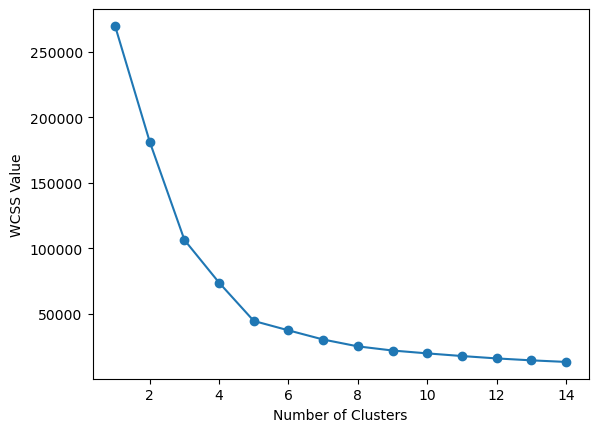

In [32]:
plt.plot(range(1,15), wcss, marker='o')
plt.ylabel('WCSS Value')
plt.xlabel('Number of Clusters')

In [35]:
from kneed import KneeLocator as kn

In [36]:
kl = kn(cluster, wcss, direction='decreasing', curve='convex')

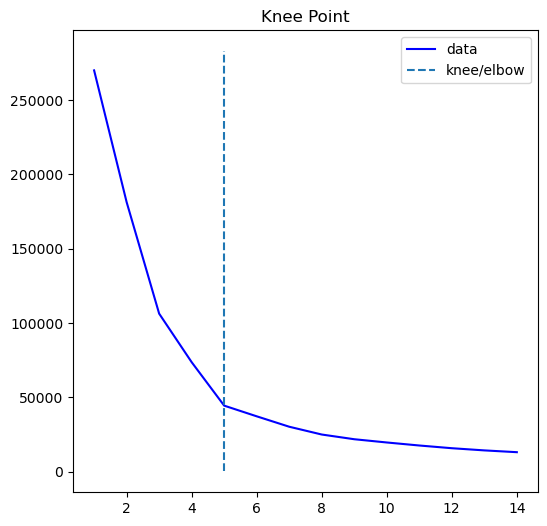

In [37]:
kl.plot_knee()

In [38]:
kl.knee

5

# After Optimizinf KMeans Cluster

In [39]:
km = KMeans(n_clusters=5)
df['defClusters'] = km.fit_predict(df[['score','income']])

In [40]:
df.head()

,age,income,score,defClusters
0,19,15,39,0
1,21,15,81,4
2,20,16,6,0
3,23,16,77,4
4,31,17,40,0


In [41]:
cen = km.cluster_centers_

In [42]:
cen

array([[20.91304348, 26.30434783],
       [82.12820513, 86.53846154],
       [17.11428571, 88.2       ],
       [49.51851852, 55.2962963 ],
       [79.36363636, 25.72727273]])

In [43]:
df0 = df[df.defClusters==0]
df1 = df[df.defClusters==1]
df2 = df[df.defClusters==2]
df3 = df[df.defClusters==3]
df4 = df[df.defClusters==4]

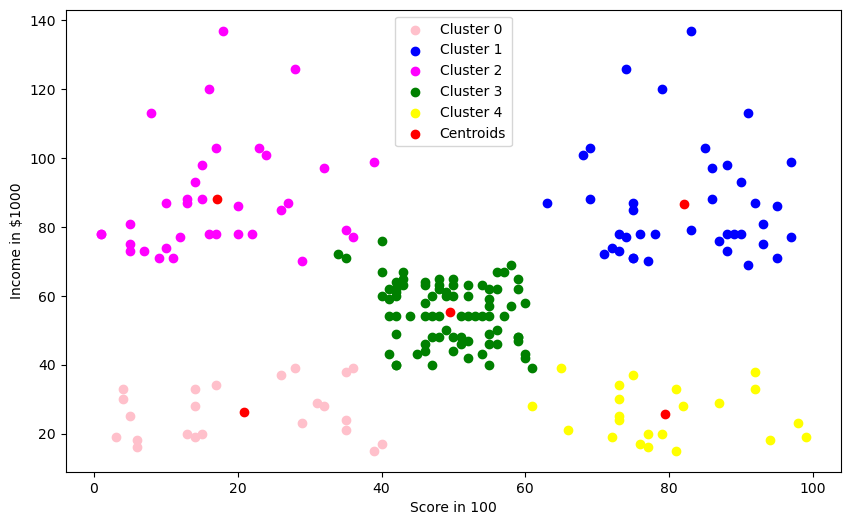

In [44]:
plt.figure(figsize=(10,6))

plt.scatter(df0.score, df0.income, color='pink', label='Cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='Cluster 1')
plt.scatter(df2.score, df2.income, color='magenta', label='Cluster 2')
plt.scatter(df3.score, df3.income, color='green', label='Cluster 3')
plt.scatter(df4.score, df4.income, color='yellow', label='Cluster 4')

plt.scatter(cen[:,0], cen[:,1], color='red', label='Centroids')

plt.xlabel('Score in 100')
plt.ylabel('Income in $1000')

plt.legend()